In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
SEED = 24

## Overview of data
- **ID** Unique ID for each home sold
- **Date** Date of the home sale
- **Price** Price of each home sold
- **Bedrooms** Number of bedrooms
- **Bathrooms** Number of bathromms, where .5 accounts for a room with a toilet but no shower
- **Sqft_living** Square footage of the apartments interior living space
- **Sqft_lot** Square footage of the land space
- **Floors** Number of floors
- **Waterfront** A dummy variable for whether the apartment was over looking  the waterfont or not
- **View** An index from 0 to 4 of how good the view of the property was
- **Condition** An index from 1 to 5 on the condition of the of the apartment 
- **Grade** An index from 1 to 13 where 1-3 falls short of building construction and design, 7 has a an average level of construction and design, and 11-13 have a high quality level of construction and design
- **Sqft_above** The square footage of the interior housing space that is bellow ground level
- **Sqft_basement** The square of the interior housing space that is below ground level
- **Yr_built** The year of the house was initially built
- **Yr_renovated** The year of the house's last renovation
- **Zipcode** What is Zipcode area the house is in
- **Lat** Lattitude
- **Long** Longitude
- **Sqft_living15** The square footage of interior housing living space for the nearest 15 neighbors
- **Sqft_lot15** the square footage of the land lots of the nearest 15 neighbors

In [3]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.info()
dataset = dataset.drop(['id','date'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
for column in dataset.columns:
    print(column, (sum(dataset[column].isnull())))

price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 0
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0


In [7]:
# remove all rows in the data that contain outlier values for these columns.
def clear_row_outliers(list_clear, dataset) :
    for column in list_clear:
        count = 0
        mean = np.mean(dataset[column])
        max_distance = np.std(dataset[column])*3
        
        for idx, row in dataset[column].T.iteritems():
            if (abs(row-mean) >= max_distance):
                dataset.drop(idx, inplace = True)
                count +=1;
        
        print(column+": "+str(count))
    
    return dataset
        
dataset = clear_row_outliers(['bedrooms','bathrooms'],dataset)

bedrooms: 75
bathrooms: 172


c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'house condition and price')

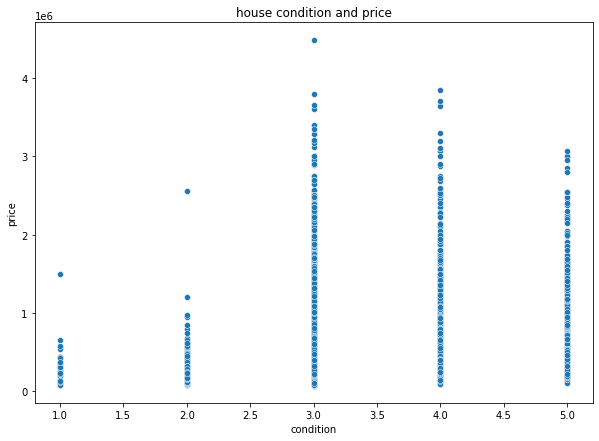

In [8]:
#onehot encoding
plt.figure(figsize=(10,7))
sns.scatterplot(dataset['condition'], dataset['price'])
plt.title('house condition and price')

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Houses condition and grade')

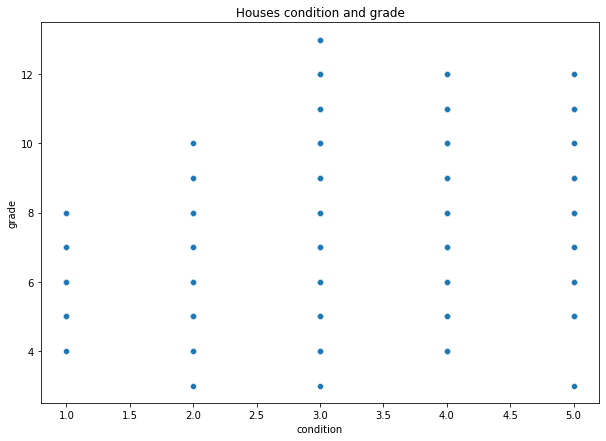

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(dataset['condition'], dataset['grade'])
plt.title('Houses condition and grade')

In [10]:
one_hot = pd.get_dummies(dataset['condition'], drop_first= True) # one-hot by pd
dataset = dataset.drop('condition', axis = 1)
dataset = dataset.join(one_hot)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,2,3,4,5
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,...,0,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,...,0,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,...,0,98136,47.5208,-122.393,1360,5000,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,...,0,98074,47.6168,-122.045,1800,7503,0,1,0,0


In [11]:
dataset['Condition_2'] = dataset[2]
dataset['Condition_3'] = dataset[3]
dataset['Condition_4'] = dataset[4]
dataset['Condition_5'] = dataset[5]
dataset = dataset.drop(2, axis=1)
dataset = dataset.drop(3, axis=1)
dataset = dataset.drop(4, axis=1)
dataset = dataset.drop(5, axis=1)


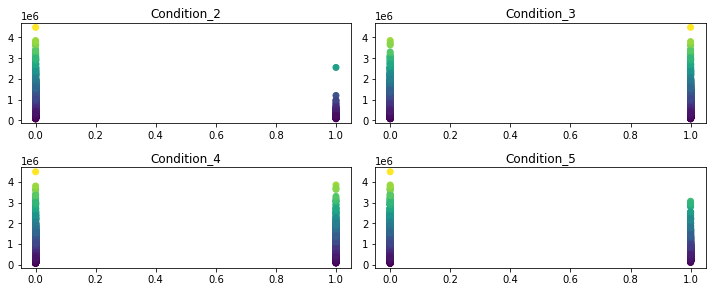

In [12]:
fig = plt.figure(figsize = (10,30))
num_list = ['Condition_2','Condition_3','Condition_4','Condition_5']
for i in range(len(num_list)):
    plt.subplot(15, 2, i + 1)
    plt.title(num_list[i])
    plt.scatter(dataset[num_list[i]], dataset['price'], c=dataset['price'])
    plt.tight_layout()
    

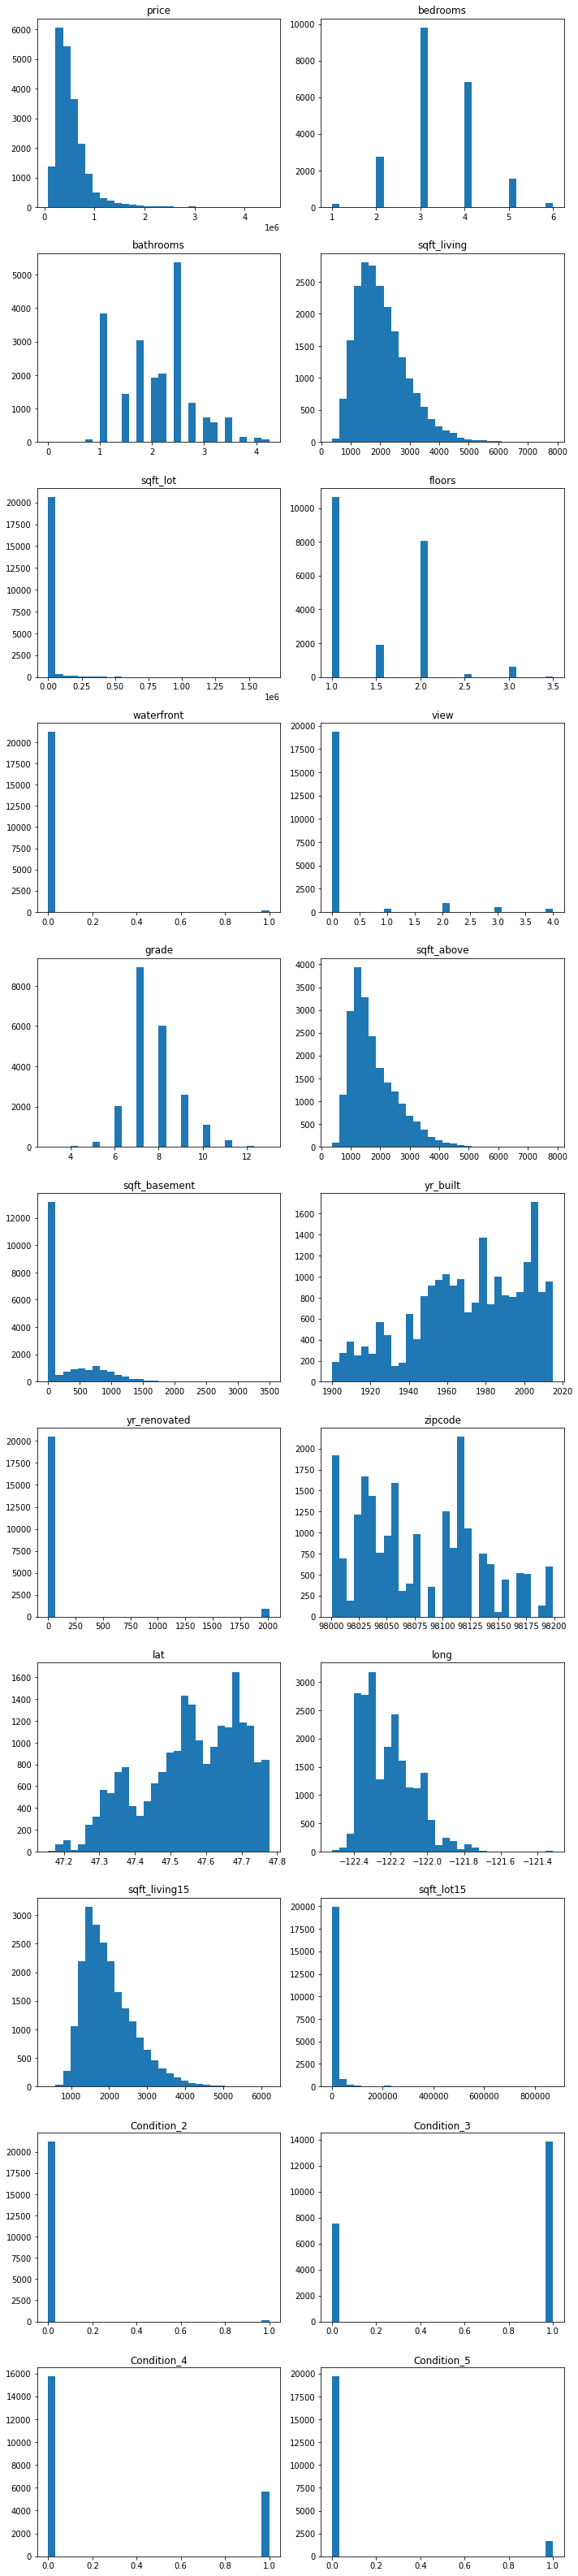

In [13]:
num_list = list(dataset.columns)
fig = plt.figure(figsize=(10,60))

for i in range(len(num_list)):
    plt.subplot(15, 2, i+1)
    plt.title(num_list[i])
    
    x = dataset.loc[:,num_list[i]]
    
    plt.hist(x, bins=30)
    plt.tight_layout()

In [14]:
x_columns = ['bedrooms','bathrooms','sqft_living','sqft_lot',
             'floors','view','grade','sqft_above','yr_built',
             'sqft_living15','sqft_lot15','Condition_2','Condition_3','Condition_4','Condition_5']
datasetnew = dataset[x_columns]
datasetnew['price'] = dataset['price']
datasetnew.head()

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,Condition_2,Condition_3,Condition_4,Condition_5,price
0,3,1.00,1180,5650,1.0,0,7,1180,1955,1340,5650,0,1,0,0,221900.0
1,3,2.25,2570,7242,2.0,0,7,2170,1951,1690,7639,0,1,0,0,538000.0
2,2,1.00,770,10000,1.0,0,6,770,1933,2720,8062,0,1,0,0,180000.0
3,4,3.00,1960,5000,1.0,0,7,1050,1965,1360,5000,0,0,0,1,604000.0
4,3,2.00,1680,8080,1.0,0,8,1680,1987,1800,7503,0,1,0,0,510000.0


<AxesSubplot:>

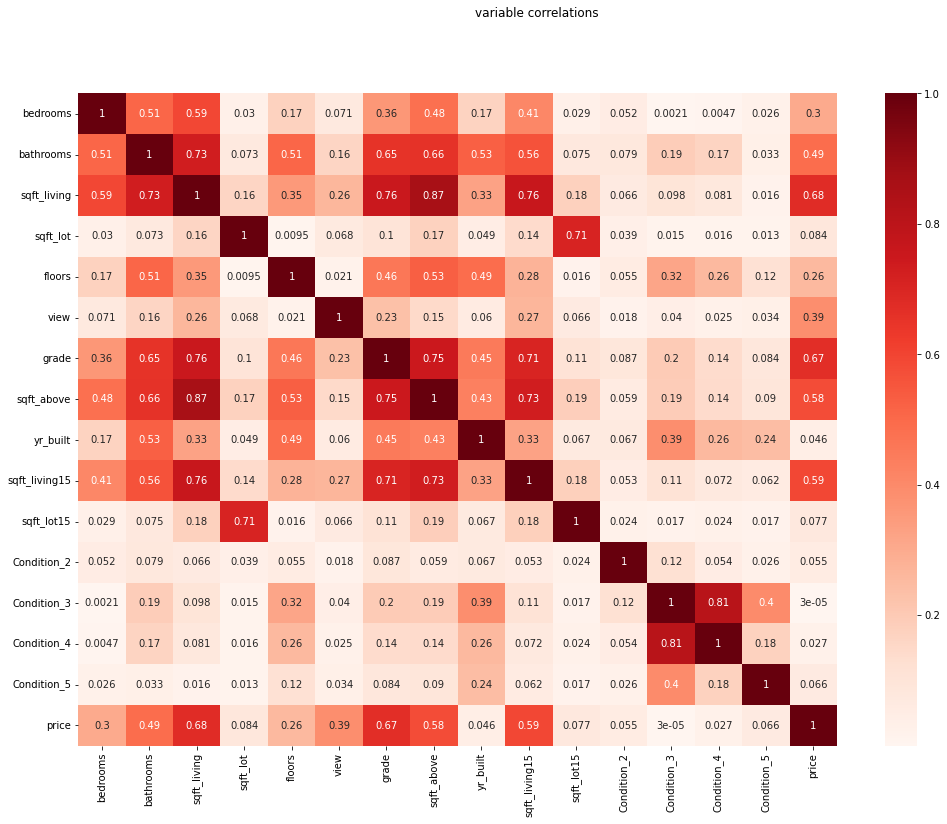

In [16]:
corr = datasetnew.corr().abs()
fig, ax = plt.subplots(figsize = (17,12))
fig.suptitle('variable correlations')
sns.heatmap(corr, cmap='Reds', annot=True)


In [17]:
features =[]
correlations = []
for idx, correlation in corr['price'].T.iteritems():    
    if correlation >= 0.30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations,
                              'features': features}).sort_values(by = 'Correlations', ascending=False)
display(corr_price_df)

,Correlations,features
2,0.677608,sqft_living
4,0.668190,grade
6,0.593759,sqft_living15
5,0.578416,sqft_above
1,0.489144,bathrooms
3,0.387881,view
0,0.302235,bedrooms


In [18]:
multi_features = []
multi_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= 0.80 and idx != feature:
            multi_features.append([feature, idx])
            multi_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)

MC_df = pd.DataFrame({'Correlation': multi_corr, 'Feature':multi_features}).sort_values(by ='Correlation', ascending=False)
display(MC_df)

,Correlation,Feature
0,0.866927,"[sqft_living, sqft_above]"
1,0.866927,"[sqft_above, sqft_living]"
2,0.812059,"[Condition_3, Condition_4]"
3,0.812059,"[Condition_4, Condition_3]"


=> Sqft_living, grade, sqft_living15,sqft_above and bathrooms have highest correlations with price.


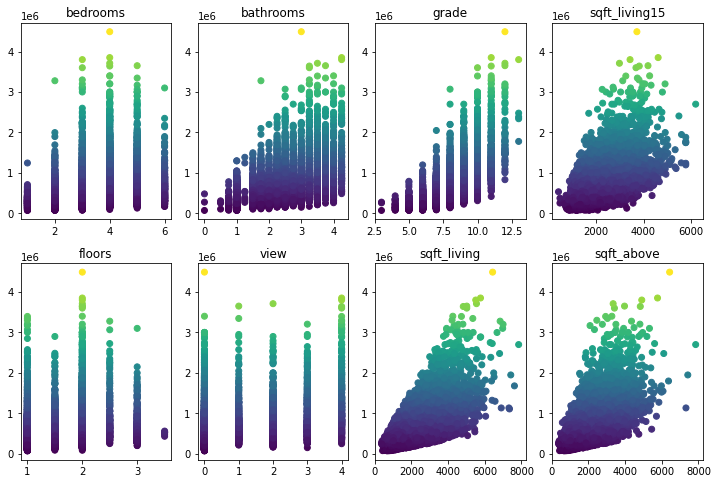

In [19]:
fig = plt.figure(figsize = (10,50))
num_list = ['bedrooms','bathrooms','grade','sqft_living15','floors','view','sqft_living','sqft_above']

for i in range(len(num_list)):
    plt.subplot(15, 4, i + 1)
    plt.title(num_list[i])
    sc = plt.scatter(dataset[num_list[i]], dataset['price'], c=dataset['price'])

plt.tight_layout()
#cbar_ax = fig.add_axes([1, 0.22, 0.05, 0.7]
#plt.colorbar(sc, cax =cbar_ax))


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [24]:
X = datasetnew.drop('price',axis=1)
y = datasetnew['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
print(X_train.shape, X_test.shape)


(14956, 15) (6410, 15)


In [30]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,Condition_2,Condition_3,Condition_4,Condition_5
16311,3,2.50,2210,8010,2.0,0,8,2210,1998,2430,9600,0,1,0,0
2290,3,1.50,1040,1824,1.0,0,6,1040,1925,1010,5100,0,1,0,0
20615,3,2.50,2424,5931,2.0,0,9,2424,2014,2424,6036,0,1,0,0
12809,4,2.25,2400,8592,2.0,0,8,2400,1978,2180,8100,0,1,0,0
4402,4,2.50,2890,7306,2.0,0,7,2890,2006,2850,6687,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,4,1.75,1740,7700,1.0,0,7,1740,1968,1740,8120,0,0,0,1
20078,4,2.50,2710,6937,2.0,0,7,2710,2009,2380,5866,0,1,0,0
14681,5,4.00,4770,31570,2.0,0,12,4770,1990,4520,32070,0,1,0,0
906,3,2.25,1654,8479,2.0,0,7,1654,1995,1654,8479,0,1,0,0


In [25]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
y_hat_train = model_linreg.predict(X_train)
y_hat_test = model_linreg.predict(X_test)

In [27]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train mean square error', train_mse)
print('Test mean square error',test_mse)

Train mean square error 38969710071.21311
Test mean square error 41993233673.89914


In [28]:
def Evaluating_model(y_test, y_pred):
    return (r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred,squared=False),mean_absolute_error(y_test, y_pred))

In [61]:
def Training_all_model_regression(X, y):
    Scalers = [['None',False],['MinMaxScaler',MinMaxScaler()],['StandarScaler',StandardScaler()]]
    
    Regressions = [['Linear Regression',LinearRegression()],
                  ['Support Vector Regression',SVR()],
                  ['Decision Tree Regression',DecisionTreeRegressor(random_state = 0 )],
                  ['Random Forest Regression',RandomForestRegressor(random_state = 0)],
                  ['Ada Boot Regressor',AdaBoostRegressor(random_state = 0)],
                  ['Gradient Booting Regressor',GradientBoostingRegressor(random_state = 0)]]
    
    data_res = pd.DataFrame(index = None, columns = ['Scaller','Model','R_Score','RMSE','MAE'])
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
    
    for scaler in Scalers:
        X_sc = X.copy()
        
        if scaler[0] != 'None':
            X_sc = scaler[1].fit_transform(X)
            
        X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = SEED)
        
        for mod in Regressions:
            model = mod[1]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            R_Score,RMSE,MAE = Evaluating_model(y_test, y_pred)
            
            data_res = data_res.append(pd.Series({'Scaller':scaler[0],
                                                  'Model':mod[0],
                                                  'R_Score':R_Score,
                                                  'RMSE':MSE,'MAE':MAE}),ignore_index=True)
            
    return data_res
        
        

In [64]:
df = Training_all_model_regression(X, y)

In [65]:
%%time

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [66]:
df

,Scaller,Model,R_Score,MSE,MAE
0,None,Linear Regression,0.629241,4.199323e+10,135601.042570
1,None,Support Vector Regression,-0.055560,1.195558e+11,213170.382721
2,None,Decision Tree Regression,0.461493,6.099283e+10,155745.366459
3,None,Random Forest Regression,0.719084,3.181738e+10,114129.126426
4,None,Ada Boot Regressor,0.237280,8.638789e+10,245126.906363
5,None,Gradient Booting Regressor,0.717884,3.195334e+10,120300.297845
6,MinMaxScaler,Linear Regression,0.629241,4.199323e+10,135601.042570
7,MinMaxScaler,Support Vector Regression,-0.054428,1.194275e+11,213002.458572
8,MinMaxScaler,Decision Tree Regression,0.466018,6.048034e+10,155458.737441
9,MinMaxScaler,Random Forest Regression,0.719071,3.181885e+10,114160.324993


In [29]:
## feature selection

X_fs = X.copy()
X_fs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,Condition_2,Condition_3,Condition_4,Condition_5
0,3,1.00,1180,5650,1.0,0,7,1180,1955,1340,5650,0,1,0,0
1,3,2.25,2570,7242,2.0,0,7,2170,1951,1690,7639,0,1,0,0
2,2,1.00,770,10000,1.0,0,6,770,1933,2720,8062,0,1,0,0
3,4,3.00,1960,5000,1.0,0,7,1050,1965,1360,5000,0,0,0,1
4,3,2.00,1680,8080,1.0,0,8,1680,1987,1800,7503,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,8,1530,2009,1530,1509,0,1,0,0
21609,4,2.50,2310,5813,2.0,0,8,2310,2014,1830,7200,0,1,0,0
21610,2,0.75,1020,1350,2.0,0,7,1020,2009,1020,2007,0,1,0,0
21611,3,2.50,1600,2388,2.0,0,8,1600,2004,1410,1287,0,1,0,0


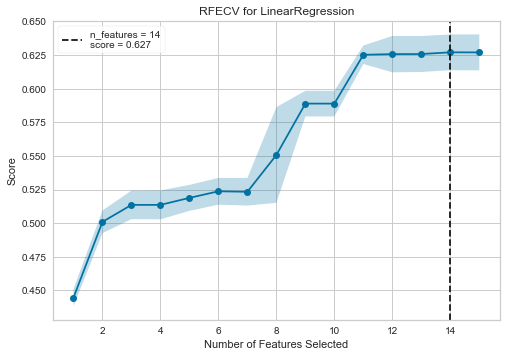

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_rfe.py", line 222, in fit
    return self._fit(X, y, **fit_params)
  File "c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-pa

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_rfe.py", line 222, in fit
    return self._fit(X, y, **fit_params)
  File "c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-pa

KeyboardInterrupt: 

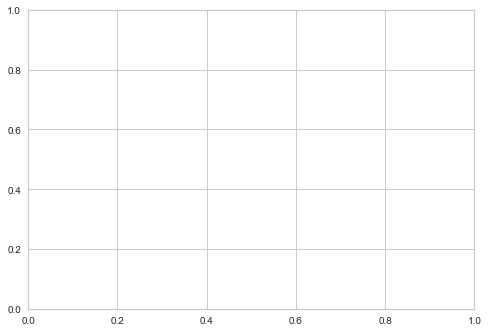

In [32]:
from yellowbrick.model_selection import RFECV as RFECV_2

Regressions = [['Linear Regression',LinearRegression()],
                  ['Support Vector Regression',SVR()],
                  ['Decision Tree Regression',DecisionTreeRegressor(random_state = 0 )],
                  ['Random Forest Regression',RandomForestRegressor(random_state = 0)],
                  ['Ada Boot Regressor',AdaBoostRegressor(random_state = 0)],
                  ['Gradient Booting Regressor',GradientBoostingRegressor(random_state = 0)]]

for model in Regressions:
    visualizer = RFECV_2(model[1])
    visualizer.fit(X, y) 
    visualizer.show()

# thống kê tất cả các feature + scaler cho từng model

In [ ]:
def select_features(X_train, X_test, y_train, y_test, model):
    for
    fs = SelectKBest(score_func=f_regression, k = 'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    
    

In [ ]:
def Test_all(X, y) :
    Scalers = [['None',False],['MinMaxScaler',MinMaxScaler()],['StandarScaler',StandardScaler()]]
    
    Regressions = [['Linear Regression',LinearRegression()],
                  ['Support Vector Regression',SVR()],
                  ['Decision Tree Regression',DecisionTreeRegressor(random_state = 0 )],
                  ['Random Forest Regression',RandomForestRegressor(random_state = 0)],
                  ['Ada Boot Regressor',AdaBoostRegressor(random_state = 0)],
                  ['Gradient Booting Regressor',GradientBoostingRegressor(random_state = 0)]]
    
    